## 데이터 불러오기

In [507]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [521]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detecte

In [522]:
import pymongo
client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection=db['festival_period_2023']
data = collection.find()
df_festival = pd.DataFrame(data)
df_festival

,_id,region,title,address,date
0,65dbe693bb908e26c802d5a8,인천,인천펜타포트 음악축제,인천광역시 연수구 센트럴로 350,일정 : 2023.08.04 ~ 2023.08.06
1,65dbe693bb908e26c802d5a9,인천,인천펜타포트락페스티벌,인천광역시 연수구 센트럴로 350,일정 : 2023.08.04 ~ 2023.08.06
2,65dbe693bb908e26c802d5aa,인천,인천생활문화축제,인천광역시 중구 월미로 131-22,일정 : 2023.10.14 ~ 2023.10.15
3,65dbe693bb908e26c802d5ab,인천,제34회 화도진축제,인천광역시 동구 참외전로 125 (동인천역 광장),일정 : 2023.05.19 ~ 2023.05.20
4,65dbe693bb908e26c802d5ac,인천,동인천 낭만축제,NaN,일정 : 2023.10.14 ~ 2023.10.15
...,...,...,...,...,...
5135,65dbe694bb908e26c802e9b7,강원도,꽃지 해넘이 행사,NaN,일정 : 2023.12.31 ~ 2023.12.31
5136,65dbe694bb908e26c802e9b8,강원도,부산시민의종 타종식,부산광역시 중구 용두산길 37-55(광복동2가),일정 : 2023.12.31 ~ 2024.01.01
5137,65dbe694bb908e26c802e9b9,강원도,해맞이축제,NaN,일정 : 2023.12.31 ~ 2024.01.01
5138,65dbe694bb908e26c802e9ba,강원도,간절곶 해맞이 축제,울산광역시 울주군 서생면 간절곶1길 39-2,일정 : 2023.12.31 ~ 2024.01.01


In [523]:
df_festival['start_date']= df_festival['date'].str[5:15]
df_festival['end_date']= df_festival['date'].str[18:]

In [524]:
df_festival['start_date']=pd.to_datetime(df_festival['start_date'],format="%Y.%m.%d")
df_festival['end_date']=pd.to_datetime(df_festival['end_date'],format="%Y.%m.%d")
df_festival['festival_period'] = df_festival['end_date'] - df_festival['start_date']

## 데이터 전처리

### 결측치 확인 및 제거

In [539]:
df_festival.isnull().sum()

_id                  0
region               0
title                0
address            795
date                 0
start_date           0
end_date             0
festival_period      0
dtype: int64

In [540]:
df_festival = df_festival.dropna()

In [541]:
df_festival.isnull().sum()

_id                0
region             0
title              0
address            0
date               0
start_date         0
end_date           0
festival_period    0
dtype: int64

### 지역이 잘못 입력된 데이터 삭제

In [542]:
df_festival['region'].value_counts()

region
강원도    871
제주     871
부산     869
인천     867
서울     867
Name: count, dtype: int64

In [543]:
condition_region = "region=='인천'" 
condition_address = "~address.str.contains('인천')"
conditions = f"{condition_address} and {condition_region}"
df_festival.query(conditions).index
df_festival = df_festival.drop(df_festival.query(conditions).index)
df_festival.query(conditions)

,_id,region,title,address,date,start_date,end_date,festival_period


In [544]:
condition_region = "region=='강원도'" 
condition_address = "~address.str.contains('강원도')"
conditions = f"{condition_address} and {condition_region}"
df_festival = df_festival.drop(df_festival.query(conditions).index)
df_festival.query(conditions)

,_id,region,title,address,date,start_date,end_date,festival_period


In [545]:
condition_region = "region=='제주'" 
condition_address = "~address.str.contains('제주')"
conditions = f"{condition_address} and {condition_region}"
df_festival = df_festival.drop(df_festival.query(conditions).index)
df_festival.query(conditions)

,_id,region,title,address,date,start_date,end_date,festival_period


In [546]:
condition_region = "region=='부산'" 
condition_address = "~address.str.contains('부산')"
conditions = f"{condition_address} and {condition_region}"
df_festival = df_festival.drop(df_festival.query(conditions).index)
df_festival.query(conditions)

,_id,region,title,address,date,start_date,end_date,festival_period


In [547]:
condition_region = "region=='서울'" 
condition_address = "~address.str.contains('서울')"
conditions = f"{condition_address} and {condition_region}"
df_festival = df_festival.drop(df_festival.query(conditions).index)
df_festival.query(conditions)

,_id,region,title,address,date,start_date,end_date,festival_period


### 중복값 제거

In [548]:
df_festival.duplicated(subset=['title', 'address','address','date']).sum()

18

In [549]:
duplicated_rows = df_festival[df_festival.duplicated(subset=['title', 'address', 'date', 'region'])]
duplicated_rows

,_id,region,title,address,date,start_date,end_date,festival_period
1040,65dbe693bb908e26c802d9b8,부산,2023 해운대카운트다운&해맞이축제,부산광역시 해운대구 중동2로 11,일정 : 2023.01.01 ~ 2023.01.01,2023-01-01,2023-01-01,0 days
1041,65dbe693bb908e26c802d9b9,부산,2023 계묘년 해맞이행사,부산광역시 남구 오륙도로 137,일정 : 2023.01.01 ~ 2023.01.01,2023-01-01,2023-01-01,0 days
1054,65dbe693bb908e26c802d9c6,부산,동래읍성역사축제,부산광역시 동래구 문화로 80(명륜동),일정 : 2023.10.13 ~ 2023.10.15,2023-10-13,2023-10-15,2 days
3149,65dbe694bb908e26c802e1f5,제주,휴애리 유채꽃 축제,제주특별자치도 서귀포시 남원읍 신례동로 256,일정 : 2023.01.01 ~ 2023.03.31,2023-01-01,2023-03-31,89 days
4115,65dbe694bb908e26c802e5bb,강원도,태백산 눈축제,강원도 태백시 장성1길 171,일정 : 2023.01.01 ~ 2023.01.01,2023-01-01,2023-01-01,0 days
4120,65dbe694bb908e26c802e5c0,강원도,제25회 원주한지문화제,강원도 원주시 한지공원길 151,일정 : 2023.05.05 ~ 2023.05.14,2023-05-05,2023-05-14,9 days
4124,65dbe694bb908e26c802e5c4,강원도,제16회 용수골꽃양귀비축제,강원도 원주시 한지공원길 151,일정 : 2023.05.23 ~ 2023.06.11,2023-05-23,2023-06-11,19 days
4126,65dbe694bb908e26c802e5c6,강원도,제21회 장미축제,강원도 원주시 장미공원길 67-16,일정 : 2023.05.30 ~ 2023.06.01,2023-05-30,2023-06-01,2 days
4129,65dbe694bb908e26c802e5c9,강원도,제13회 남한강축제,강원도 원주시 부론면 앙암로 1234,일정 : 2023.07.29 ~ 2023.07.30,2023-07-29,2023-07-30,1 days
4131,65dbe694bb908e26c802e5cb,강원도,치악산복숭아축제,강원도 원주시 단구로 170,일정 : 2023.08.01 ~ 2023.08.01,2023-08-01,2023-08-01,0 days


In [550]:
df_festival=df_festival.drop_duplicates(subset=['title','address','date','region'])
df_festival.duplicated(subset=['title','address','date','region']).sum()

0

In [551]:
df_festival['region'].value_counts()

region
제주     137
서울      64
부산      41
강원도     26
인천      20
Name: count, dtype: int64

In [552]:
condition_region = "region=='인천'" 
df_festival.query(condition_region).sort_values(by='date')

,_id,region,title,address,date,start_date,end_date,festival_period
5,65dbe693bb908e26c802d5ad,인천,2023 자유공원 벚꽃축제,인천광역시 중구 제물량로232번길 46,일정 : 2023.04.08 ~ 2023.04.08,2023-04-08,2023-04-08,0 days
6,65dbe693bb908e26c802d5ae,인천,계양산국악제,인천광역시 계양구 주부토로 570,일정 : 2023.04.21 ~ 2023.04.22,2023-04-21,2023-04-22,1 days
7,65dbe693bb908e26c802d5af,인천,2023 가족의 달 어린이축제,인천광역시 중구 제물량로 238,일정 : 2023.05.06 ~ 2023.05.07,2023-05-06,2023-05-07,1 days
3,65dbe693bb908e26c802d5ab,인천,제34회 화도진축제,인천광역시 동구 참외전로 125 (동인천역 광장),일정 : 2023.05.19 ~ 2023.05.20,2023-05-19,2023-05-20,1 days
8,65dbe693bb908e26c802d5b0,인천,아라뱃길 카약축제,인천광역시 서구 정서진1로 41,일정 : 2023.06.17 ~ 2023.06.17,2023-06-17,2023-06-17,0 days
0,65dbe693bb908e26c802d5a8,인천,인천펜타포트 음악축제,인천광역시 연수구 센트럴로 350,일정 : 2023.08.04 ~ 2023.08.06,2023-08-04,2023-08-06,2 days
1,65dbe693bb908e26c802d5a9,인천,인천펜타포트락페스티벌,인천광역시 연수구 센트럴로 350,일정 : 2023.08.04 ~ 2023.08.06,2023-08-04,2023-08-06,2 days
9,65dbe693bb908e26c802d5b1,인천,무의도 춤축제,인천광역시 중구 신포로27번길 80,일정 : 2023.08.05 ~ 2023.08.05,2023-08-05,2023-08-05,0 days
11,65dbe693bb908e26c802d5b3,인천,INK 콘서트,인천광역시 미추홀구 매소홀로 618,일정 : 2023.09.09 ~ 2023.09.09,2023-09-09,2023-09-09,0 days
12,65dbe693bb908e26c802d5b4,인천,제23회소래포구축제,"인천광역시 남동구 아암대로 1550, (논현동)",일정 : 2023.09.15 ~ 2023.09.17,2023-09-15,2023-09-17,2 days


In [553]:
df_festival = df_festival.drop([0,14])

In [554]:
condition_region = "region=='강원도'" 
df_festival.query(condition_region).sort_values(by='date')

,_id,region,title,address,date,start_date,end_date,festival_period
4112,65dbe694bb908e26c802e5b8,강원도,애니메이션박물관 제17회 기획전 세상을 바꾼 불꽃 태일이,강원도 춘천시 서면 박사로 854 애니메이션박물관,일정 : 2022.05.03 ~ 2023.04.16,2022-05-03,2023-04-16,348 days
4113,65dbe694bb908e26c802e5b9,강원도,강원대학교 산학협력단 K-Digital Training 제2기 교육생 모집,강원도 춘천시 강원대학길 1,일정 : 2022.10.04 ~ 2023.03.13,2022-10-04,2023-03-13,160 days
4114,65dbe694bb908e26c802e5ba,강원도,평창송어축제,강원도 평창군 진부면 경강로 3562,일정 : 2022.12.30 ~ 2023.01.29,2022-12-30,2023-01-29,30 days
4110,65dbe694bb908e26c802e5b6,강원도,태백산 눈축제,강원도 태백시 장성1길 171,일정 : 2023.01.01 ~ 2023.01.01,2023-01-01,2023-01-01,0 days
4116,65dbe694bb908e26c802e5bc,강원도,대관령눈꽃축제,강원도 평창군 대관령면 사부랑길224-2,일정 : 2023.01.13 ~ 2023.01.22,2023-01-13,2023-01-22,9 days
4117,65dbe694bb908e26c802e5bd,강원도,삼척정월대보름제,강원도 강원도 삼척시청 엑스포로 45,일정 : 2023.02.03 ~ 2023.02.05,2023-02-03,2023-02-05,2 days
4118,65dbe694bb908e26c802e5be,강원도,삼척맹방유채꽃행사,강원도 삼척시 근덕면 삼척로 3916-112(마을회관),일정 : 2023.04.07 ~ 2023.04.16,2023-04-07,2023-04-16,9 days
4119,65dbe694bb908e26c802e5bf,강원도,제25회 원주한지문화제,강원도 원주시 한지공원길 151,일정 : 2023.05.05 ~ 2023.05.14,2023-05-05,2023-05-14,9 days
4121,65dbe694bb908e26c802e5c1,강원도,삼척장미축제,강원도 강원도 삼척시청 오십천로 536,일정 : 2023.05.20 ~ 2023.05.24,2023-05-20,2023-05-24,4 days
4122,65dbe694bb908e26c802e5c2,강원도,황영조 국제 마라톤 대회,강원도 강원도 삼척시청 엑스포로 45,일정 : 2023.05.21 ~ 2023.05.21,2023-05-21,2023-05-21,0 days


In [555]:
df_festival = df_festival.drop([4113])

In [556]:
condition_region = "region=='제주'" 
df_festival.query(condition_region).sort_values(by='date')

,_id,region,title,address,date,start_date,end_date,festival_period
3101,65dbe694bb908e26c802e1c5,제주,제주 다이노스 어라이브,제주특별자치도 서귀포시 안덕면 녹차분재로 218,일정 : 2022.08.10 ~ 2023.08.09,2022-08-10,2023-08-09,364 days
3148,65dbe694bb908e26c802e1f4,제주,빛의 벙커 ’세잔프로방스의빛/칸딘스키’ 전,제주특별자치도 서귀포시 선산읍 서성이로 1168번길 89-17,일정 : 2022.11.04 ~ 2023.10.15,2022-11-04,2023-10-15,345 days
3112,65dbe694bb908e26c802e1d0,제주,제30회 성산일출축제,제주특별자치도 서귀포시 성산읍 일출로 284-12,일정 : 2022.12.31 ~ 2023.01.01,2022-12-31,2023-01-01,1 days
3080,65dbe694bb908e26c802e1b0,제주,휴애리 유채꽃 축제,제주특별자치도 서귀포시 남원읍 신례동로 256,일정 : 2023.01.01 ~ 2023.03.31,2023-01-01,2023-03-31,89 days
3113,65dbe694bb908e26c802e1d1,제주,한림공원 수선화축제,제주특별자치도 제주시 한림읍 한림로 300,일정 : 2023.01.21 ~ 2023.02.19,2023-01-21,2023-02-19,29 days
...,...,...,...,...,...,...,...,...
3110,65dbe694bb908e26c802e1ce,제주,제29회 제주 성읍마을 전통민속재현축제,제주특별자치도 서귀포시 표선면 성읍정의현로 30,일정 : 2023.11.03 ~ 2023.11.05,2023-11-03,2023-11-05,2 days
3111,65dbe694bb908e26c802e1cf,제주,2023 제주시 소상공인 한마음 박람회,제주특별자치도 제주시 오일장서길 26,일정 : 2023.11.10 ~ 2023.11.11,2023-11-10,2023-11-11,1 days
3147,65dbe694bb908e26c802e1f3,제주,서문반짝마켓,제주특별자치도 제주시 서문로4길 13-2,일정 : 2023.11.10 ~ 2023.12.02,2023-11-10,2023-12-02,22 days
3219,65dbe694bb908e26c802e23b,제주,휴애리 동백축제,제주특별자치도 서귀포시 남원읍 신례동로 256,일정 : 2023.11.14 ~ 2024.01.31,2023-11-14,2024-01-31,78 days


In [557]:
df_festival = df_festival.drop([3115,3116,3120,3159,3160,3164,3166,3195,3183,3214,3207,3204])

In [558]:
condition_region = "region=='부산'" 
df_festival.query(condition_region).sort_values(by='date')

,_id,region,title,address,date,start_date,end_date,festival_period
1026,65dbe693bb908e26c802d9aa,부산,2023 해운대카운트다운&해맞이축제,부산광역시 해운대구 중동2로 11,일정 : 2023.01.01 ~ 2023.01.01,2023-01-01,2023-01-01,0 days
1027,65dbe693bb908e26c802d9ab,부산,2023 계묘년 해맞이행사,부산광역시 남구 오륙도로 137,일정 : 2023.01.01 ~ 2023.01.01,2023-01-01,2023-01-01,0 days
1042,65dbe693bb908e26c802d9ba,부산,2023 지금여기 금정 관광후기 이벤트,부산광역시 금정구 중앙대로 1777,일정 : 2023.02.01 ~ 2023.11.30,2023-02-01,2023-11-30,302 days
1043,65dbe693bb908e26c802d9bb,부산,제38회 해운대 달맞이온천축제,부산광역시 해운대구 중동2로 11,일정 : 2023.02.03 ~ 2023.02.05,2023-02-03,2023-02-05,2 days
1044,65dbe693bb908e26c802d9bc,부산,2023 정월대보름 달맞이축제,부산광역시 남구 분포로 66-40,일정 : 2023.02.05 ~ 2023.02.05,2023-02-05,2023-02-05,0 days
1045,65dbe693bb908e26c802d9bd,부산,낙동강유채꽃축제,부산광역시 강서구 공항로 1246(대저1동),일정 : 2023.04.08 ~ 2023.04.16,2023-04-08,2023-04-16,8 days
1046,65dbe693bb908e26c802d9be,부산,광안리어방축제,부산광역시 수영구 남천동로100,일정 : 2023.05.12 ~ 2023.05.14,2023-05-12,2023-05-14,2 days
1047,65dbe693bb908e26c802d9bf,부산,제18회 해운대 모래축제,부산광역시 해운대구 중동2로 11,일정 : 2023.05.19 ~ 2023.05.22,2023-05-19,2023-05-22,3 days
1029,65dbe693bb908e26c802d9ad,부산,부산원도심골목길축제,부산광역시 동구 증산북로 18-11,일정 : 2023.05.20 ~ 2023.05.21,2023-05-20,2023-05-21,1 days
1048,65dbe693bb908e26c802d9c0,부산,제18회 국제매직페스티벌,부산광역시 해운대구 중동2로 11,일정 : 2023.07.01 ~ 2023.07.02,2023-07-01,2023-07-02,1 days


In [559]:
df_festival = df_festival.drop([1030,1037])

In [560]:
condition_region = "region=='서울'" 
df_festival.query(condition_region).sort_values(by='date')

,_id,region,title,address,date,start_date,end_date,festival_period
2058,65dbe693bb908e26c802ddb2,서울,제20회 강북구 3·1독립운동 기념행사,서울특별시 강북구 삼양로173길 107-12,일정 : 2023.03.01 ~ 2023.03.01,2023-03-01,2023-03-01,0 days
2059,65dbe693bb908e26c802ddb3,서울,제1회 중곡2동 긴고랑 왕벚꽃축제,서울특별시 광진구 능동로 346(중곡동),일정 : 2023.04.01 ~ 2023.04.01,2023-04-01,2023-04-01,0 days
2060,65dbe693bb908e26c802ddb4,서울,동대문구 봄꽃축제,서울특별시 동대문구 천호대로 145,일정 : 2023.04.01 ~ 2023.04.02,2023-04-01,2023-04-02,1 days
2061,65dbe693bb908e26c802ddb5,서울,제1회 중곡3동 벚꽃축제,서울특별시 광진구 동일로76가길 28(중곡동),일정 : 2023.04.02 ~ 2023.04.02,2023-04-02,2023-04-02,0 days
2062,65dbe693bb908e26c802ddb6,서울,석촌호수벚꽃축제,서울특별시 송파구 석촌호수로 197,일정 : 2023.04.05 ~ 2023.04.09,2023-04-05,2023-04-09,4 days
...,...,...,...,...,...,...,...,...
2114,65dbe693bb908e26c802ddea,서울,서초골 축제,서울특별시 서초구 남부순환로 2406,일정 : 2023.11.01 ~ 2023.11.30,2023-11-01,2023-11-30,29 days
2115,65dbe693bb908e26c802ddeb,서울,2023 모두의 축제: 청춘 관악,서울특별시 관악구 관천로 53,일정 : 2023.11.04 ~ 2023.11.04,2023-11-04,2023-11-04,0 days
2116,65dbe693bb908e26c802ddec,서울,개천절 대제전,서울특별시 종로구 인왕산로 22,일정 : 2023.11.15 ~ 2023.11.15,2023-11-15,2023-11-15,0 days
2117,65dbe693bb908e26c802dded,서울,2023년 송년의 밤 특별 콘서트,서울특별시 강서구 가로공원로 195,일정 : 2023.12.12 ~ 2023.12.12,2023-12-12,2023-12-12,0 days


In [561]:
df_festival = df_festival.drop([2057])

### 이상치 확인 및 처리

In [562]:
df_festival.sort_values(by='festival_period')

,_id,region,title,address,date,start_date,end_date,festival_period
2065,65dbe693bb908e26c802ddb9,서울,2023년 개화산 봄꽃축제,서울특별시 강서구 금낭화로 176,일정 : 2023.04.22 ~ 2022.04.22,2023-04-22,2022-04-22,-365 days
3169,65dbe694bb908e26c802e209,제주,보목자리돔축제,제주특별자치도 서귀포시 보목포로 46,일정 : 2023.05.26 ~ 2023.05.18,2023-05-26,2023-05-18,-8 days
3086,65dbe694bb908e26c802e1b6,제주,제주 기상 100주년 기념 문화제,제주특별자치도 제주시 중앙로7길,일정 : 2023.04.28 ~ 2023.04.28,2023-04-28,2023-04-28,0 days
3083,65dbe694bb908e26c802e1b3,제주,제주MBC 국제평화마라톤,제주특별자치도 제주시 한림읍 한림중앙로 71-9,일정 : 2023.03.26 ~ 2023.03.26,2023-03-26,2023-03-26,0 days
2117,65dbe693bb908e26c802dded,서울,2023년 송년의 밤 특별 콘서트,서울특별시 강서구 가로공원로 195,일정 : 2023.12.12 ~ 2023.12.12,2023-12-12,2023-12-12,0 days
...,...,...,...,...,...,...,...,...
1042,65dbe693bb908e26c802d9ba,부산,2023 지금여기 금정 관광후기 이벤트,부산광역시 금정구 중앙대로 1777,일정 : 2023.02.01 ~ 2023.11.30,2023-02-01,2023-11-30,302 days
3148,65dbe694bb908e26c802e1f4,제주,빛의 벙커 ’세잔프로방스의빛/칸딘스키’ 전,제주특별자치도 서귀포시 선산읍 서성이로 1168번길 89-17,일정 : 2022.11.04 ~ 2023.10.15,2022-11-04,2023-10-15,345 days
4112,65dbe694bb908e26c802e5b8,강원도,애니메이션박물관 제17회 기획전 세상을 바꾼 불꽃 태일이,강원도 춘천시 서면 박사로 854 애니메이션박물관,일정 : 2022.05.03 ~ 2023.04.16,2022-05-03,2023-04-16,348 days
3124,65dbe694bb908e26c802e1dc,제주,플리마켓 <신화愛퐁당>,제주특별자치도 서귀포시 안덕면 신화역사로304번길 38,일정 : 2023.04.08 ~ 2024.03.31,2023-04-08,2024-03-31,358 days


In [563]:
df_festival.loc[2065,'end_date']=df_festival.loc[2065,'end_date'].replace(year=2023)
df_festival.loc[2065,'start_date']=df_festival.loc[2065,'start_date'].replace(year=2023)
df_festival['festival_period'] = df_festival['end_date'] - df_festival['start_date']

In [564]:
df_festival.loc[3169,'end_date']=df_festival.loc[3169,'end_date'].replace(day=26)
df_festival.loc[3169,'start_date']=df_festival.loc[3169,'start_date'].replace(day=18)
df_festival['festival_period'] = df_festival['end_date'] - df_festival['start_date']

In [565]:
df_festival.sort_values(by='festival_period')

,_id,region,title,address,date,start_date,end_date,festival_period
3094,65dbe694bb908e26c802e1be,제주,2023 제주 요가 페스티벌,제주특별자치도 제주시 연삼로 286,일정 : 2023.06.10 ~ 2023.06.10,2023-06-10,2023-06-10,0 days
3086,65dbe694bb908e26c802e1b6,제주,제주 기상 100주년 기념 문화제,제주특별자치도 제주시 중앙로7길,일정 : 2023.04.28 ~ 2023.04.28,2023-04-28,2023-04-28,0 days
3083,65dbe694bb908e26c802e1b3,제주,제주MBC 국제평화마라톤,제주특별자치도 제주시 한림읍 한림중앙로 71-9,일정 : 2023.03.26 ~ 2023.03.26,2023-03-26,2023-03-26,0 days
2117,65dbe693bb908e26c802dded,서울,2023년 송년의 밤 특별 콘서트,서울특별시 강서구 가로공원로 195,일정 : 2023.12.12 ~ 2023.12.12,2023-12-12,2023-12-12,0 days
2116,65dbe693bb908e26c802ddec,서울,개천절 대제전,서울특별시 종로구 인왕산로 22,일정 : 2023.11.15 ~ 2023.11.15,2023-11-15,2023-11-15,0 days
...,...,...,...,...,...,...,...,...
1042,65dbe693bb908e26c802d9ba,부산,2023 지금여기 금정 관광후기 이벤트,부산광역시 금정구 중앙대로 1777,일정 : 2023.02.01 ~ 2023.11.30,2023-02-01,2023-11-30,302 days
3148,65dbe694bb908e26c802e1f4,제주,빛의 벙커 ’세잔프로방스의빛/칸딘스키’ 전,제주특별자치도 서귀포시 선산읍 서성이로 1168번길 89-17,일정 : 2022.11.04 ~ 2023.10.15,2022-11-04,2023-10-15,345 days
4112,65dbe694bb908e26c802e5b8,강원도,애니메이션박물관 제17회 기획전 세상을 바꾼 불꽃 태일이,강원도 춘천시 서면 박사로 854 애니메이션박물관,일정 : 2022.05.03 ~ 2023.04.16,2022-05-03,2023-04-16,348 days
3124,65dbe694bb908e26c802e1dc,제주,플리마켓 <신화愛퐁당>,제주특별자치도 서귀포시 안덕면 신화역사로304번길 38,일정 : 2023.04.08 ~ 2024.03.31,2023-04-08,2024-03-31,358 days


### 월별 축제 개최 수

In [525]:
df_festival_month = pd.DataFrame(data= df_festival[['region','start_date','end_date']])
df_festival_month

,region,start_date,end_date
0,인천,2023-08-04,2023-08-06
1,인천,2023-08-04,2023-08-06
2,인천,2023-10-14,2023-10-15
3,인천,2023-05-19,2023-05-20
4,인천,2023-10-14,2023-10-15
...,...,...,...
5135,강원도,2023-12-31,2023-12-31
5136,강원도,2023-12-31,2024-01-01
5137,강원도,2023-12-31,2024-01-01
5138,강원도,2023-12-31,2024-01-01


In [526]:
import pandas as pd
from datetime import datetime

date_start = '2023-01-01'
date_start = datetime.strptime(date_start, '%Y-%m-%d')

date_end = '2023-01-31'
date_end = datetime.strptime(date_end, '%Y-%m-%d')
# start_date가 specified_date보다 크거나 같은 행들을 필터링
df_festival_month.loc[df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)].index,'01']=1
df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)]

,region,start_date,end_date,01
22,인천,2023-01-01,2023-01-01,1.0
23,인천,2023-01-01,2023-01-01,1.0
24,인천,2023-01-01,2023-01-01,1.0
25,인천,2023-01-01,2023-03-31,1.0
26,인천,2023-01-01,2023-01-01,1.0
...,...,...,...,...
4163,강원도,2023-01-20,2023-01-29,1.0
4164,강원도,2023-01-21,2023-02-19,1.0
4165,강원도,2023-01-27,2023-01-31,1.0
4166,강원도,2023-01-27,2023-01-31,1.0


In [527]:
date_start = '2023-02-01'
date_start = datetime.strptime(date_start, '%Y-%m-%d')

date_end = '2023-02-28'
date_end = datetime.strptime(date_end, '%Y-%m-%d')
# start_date가 specified_date보다 크거나 같은 행들을 필터링
df_festival_month.loc[df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)].index,'02']=1
df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)]

,region,start_date,end_date,01,02
25,인천,2023-01-01,2023-03-31,1.0,1.0
38,인천,2023-01-21,2023-02-19,1.0,1.0
41,인천,2023-01-30,2023-11-05,1.0,1.0
42,인천,2023-02-01,2023-12-31,NaN,1.0
43,인천,2023-02-01,2023-11-30,NaN,1.0
...,...,...,...,...,...
4186,강원도,2023-02-23,2023-02-26,NaN,1.0
4187,강원도,2023-02-24,2023-03-13,NaN,1.0
4188,강원도,2023-02-24,2023-02-26,NaN,1.0
4189,강원도,2023-02-24,2023-02-26,NaN,1.0


In [528]:
date_start = '2023-03-01'
date_start = datetime.strptime(date_start, '%Y-%m-%d')

date_end = '2023-03-31'
date_end = datetime.strptime(date_end, '%Y-%m-%d')
# start_date가 specified_date보다 크거나 같은 행들을 필터링
df_festival_month.loc[df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)].index,'03']=1
df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)]

,region,start_date,end_date,01,02,03
25,인천,2023-01-01,2023-03-31,1.0,1.0,1.0
41,인천,2023-01-30,2023-11-05,1.0,1.0,1.0
42,인천,2023-02-01,2023-12-31,NaN,1.0,1.0
43,인천,2023-02-01,2023-11-30,NaN,1.0,1.0
56,인천,2023-02-11,2023-04-30,NaN,1.0,1.0
...,...,...,...,...,...,...
4232,강원도,2023-03-31,2023-04-02,NaN,NaN,1.0
4233,강원도,2023-03-31,2023-04-02,NaN,NaN,1.0
4234,강원도,2023-03-31,2023-04-02,NaN,NaN,1.0
4235,강원도,2023-03-31,2023-04-05,NaN,NaN,1.0


In [529]:
date_start = '2023-04-01'
date_start = datetime.strptime(date_start, '%Y-%m-%d')

date_end = '2023-04-30'
date_end = datetime.strptime(date_end, '%Y-%m-%d')
# start_date가 specified_date보다 크거나 같은 행들을 필터링
df_festival_month.loc[df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)].index,'04']=1
df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)]

,region,start_date,end_date,01,02,03,04
5,인천,2023-04-08,2023-04-08,NaN,NaN,NaN,1.0
6,인천,2023-04-21,2023-04-22,NaN,NaN,NaN,1.0
41,인천,2023-01-30,2023-11-05,1.0,1.0,1.0,1.0
42,인천,2023-02-01,2023-12-31,NaN,1.0,1.0,1.0
43,인천,2023-02-01,2023-11-30,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...
4330,강원도,2023-04-29,2023-05-07,NaN,NaN,NaN,1.0
4331,강원도,2023-04-29,2023-05-14,NaN,NaN,NaN,1.0
4332,강원도,2023-04-29,2023-04-30,NaN,NaN,NaN,1.0
4333,강원도,2023-04-29,2023-04-29,NaN,NaN,NaN,1.0


In [530]:
date_start = '2023-05-01'
date_start = datetime.strptime(date_start, '%Y-%m-%d')

date_end = '2023-05-31'
date_end = datetime.strptime(date_end, '%Y-%m-%d')
# start_date가 specified_date보다 크거나 같은 행들을 필터링
df_festival_month.loc[df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)].index,'05']=1
df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)]

,region,start_date,end_date,01,02,03,04,05
3,인천,2023-05-19,2023-05-20,NaN,NaN,NaN,NaN,1.0
7,인천,2023-05-06,2023-05-07,NaN,NaN,NaN,NaN,1.0
41,인천,2023-01-30,2023-11-05,1.0,1.0,1.0,1.0,1.0
42,인천,2023-02-01,2023-12-31,NaN,1.0,1.0,1.0,1.0
43,인천,2023-02-01,2023-11-30,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
4470,강원도,2023-05-29,2023-05-29,NaN,NaN,NaN,NaN,1.0
4471,강원도,2023-05-31,2023-07-31,NaN,NaN,NaN,NaN,1.0
4472,강원도,2023-05-31,2023-06-04,NaN,NaN,NaN,NaN,1.0
4473,강원도,2023-05-31,2023-06-04,NaN,NaN,NaN,NaN,1.0


In [531]:
date_start = '2023-06-01'
date_start = datetime.strptime(date_start, '%Y-%m-%d')

date_end = '2023-06-30'
date_end = datetime.strptime(date_end, '%Y-%m-%d')
# start_date가 specified_date보다 크거나 같은 행들을 필터링
df_festival_month.loc[df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)].index,'06']=1
df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)]

,region,start_date,end_date,01,02,03,04,05,06
8,인천,2023-06-17,2023-06-17,NaN,NaN,NaN,NaN,NaN,1.0
41,인천,2023-01-30,2023-11-05,1.0,1.0,1.0,1.0,1.0,1.0
42,인천,2023-02-01,2023-12-31,NaN,1.0,1.0,1.0,1.0,1.0
43,인천,2023-02-01,2023-11-30,NaN,1.0,1.0,1.0,1.0,1.0
67,인천,2023-03-01,2023-12-31,NaN,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
4525,강원도,2023-06-24,2023-06-25,NaN,NaN,NaN,NaN,NaN,1.0
4526,강원도,2023-06-30,2023-06-30,NaN,NaN,NaN,NaN,NaN,1.0
4527,강원도,2023-06-30,2023-07-02,NaN,NaN,NaN,NaN,NaN,1.0
4528,강원도,2023-06-30,2023-07-02,NaN,NaN,NaN,NaN,NaN,1.0


In [532]:
date_start = '2023-07-01'
date_start = datetime.strptime(date_start, '%Y-%m-%d')

date_end = '2023-07-31'
date_end = datetime.strptime(date_end, '%Y-%m-%d')
# start_date가 specified_date보다 크거나 같은 행들을 필터링
df_festival_month.loc[df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)].index,'07']=1
df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)]

,region,start_date,end_date,01,02,03,04,05,06,07
41,인천,2023-01-30,2023-11-05,1.0,1.0,1.0,1.0,1.0,1.0,1.0
42,인천,2023-02-01,2023-12-31,NaN,1.0,1.0,1.0,1.0,1.0,1.0
43,인천,2023-02-01,2023-11-30,NaN,1.0,1.0,1.0,1.0,1.0,1.0
67,인천,2023-03-01,2023-12-31,NaN,NaN,1.0,1.0,1.0,1.0,1.0
115,인천,2023-04-01,2023-12-31,NaN,NaN,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4582,강원도,2023-07-29,2023-07-30,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4583,강원도,2023-07-29,2023-08-06,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4584,강원도,2023-07-29,2023-08-06,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4585,강원도,2023-07-29,2023-08-06,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [533]:
date_start = '2023-08-01'
date_start = datetime.strptime(date_start, '%Y-%m-%d')

date_end = '2023-08-31'
date_end = datetime.strptime(date_end, '%Y-%m-%d')
# start_date가 specified_date보다 크거나 같은 행들을 필터링
df_festival_month.loc[df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)].index,'08']=1
df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)]

,region,start_date,end_date,01,02,03,04,05,06,07,08
0,인천,2023-08-04,2023-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,인천,2023-08-04,2023-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,인천,2023-08-05,2023-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
10,인천,2023-08-11,2023-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
41,인천,2023-01-30,2023-11-05,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4640,강원도,2023-08-30,2023-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4641,강원도,2023-08-31,2023-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4642,강원도,2023-08-31,2023-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4643,강원도,2023-08-31,2023-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [534]:
date_start = '2023-09-01'
date_start = datetime.strptime(date_start, '%Y-%m-%d')

date_end = '2023-09-30'
date_end = datetime.strptime(date_end, '%Y-%m-%d')
# start_date가 specified_date보다 크거나 같은 행들을 필터링
df_festival_month.loc[df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)].index,'09']=1
df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)]

,region,start_date,end_date,01,02,03,04,05,06,07,08,09
11,인천,2023-09-09,2023-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12,인천,2023-09-15,2023-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
13,인천,2023-09-17,2023-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
14,인천,2023-09-22,2023-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
15,인천,2023-09-22,2023-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4779,강원도,2023-09-29,2023-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4780,강원도,2023-09-29,2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4781,강원도,2023-09-30,2023-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4782,강원도,2023-09-30,2023-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [535]:
date_start = '2023-10-01'
date_start = datetime.strptime(date_start, '%Y-%m-%d')

date_end = '2023-10-31'
date_end = datetime.strptime(date_end, '%Y-%m-%d')
# start_date가 specified_date보다 크거나 같은 행들을 필터링
df_festival_month.loc[df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)].index,'10']=1
df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)]

,region,start_date,end_date,01,02,03,04,05,06,07,08,09,10
2,인천,2023-10-14,2023-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,인천,2023-10-14,2023-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
16,인천,2023-09-26,2024-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
17,인천,2023-10-05,2023-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
18,인천,2023-10-07,2023-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,강원도,2023-10-28,2023-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5036,강원도,2023-10-28,2023-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5037,강원도,2023-10-28,2023-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5038,강원도,2023-10-28,2023-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [536]:
date_start = '2023-11-01'
date_start = datetime.strptime(date_start, '%Y-%m-%d')

date_end = '2023-11-30'
date_end = datetime.strptime(date_end, '%Y-%m-%d')
# start_date가 specified_date보다 크거나 같은 행들을 필터링
df_festival_month.loc[df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)].index,'11']=1
df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)]

,region,start_date,end_date,01,02,03,04,05,06,07,08,09,10,11
16,인천,2023-09-26,2024-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
41,인천,2023-01-30,2023-11-05,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
42,인천,2023-02-01,2023-12-31,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
43,인천,2023-02-01,2023-11-30,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67,인천,2023-03-01,2023-12-31,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5092,강원도,2023-11-24,2023-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5093,강원도,2023-11-24,2023-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5094,강원도,2023-11-24,2023-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5095,강원도,2023-11-25,2023-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [537]:
date_start = '2023-12-01'
date_start = datetime.strptime(date_start, '%Y-%m-%d')

date_end = '2023-12-31'
date_end = datetime.strptime(date_end, '%Y-%m-%d')
# start_date가 specified_date보다 크거나 같은 행들을 필터링
df_festival_month.loc[df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)].index,'12']=1
df_festival_month[(df_festival_month['end_date'] >= date_start) & (df_festival_month['start_date'] <= date_end)]

,region,start_date,end_date,01,02,03,04,05,06,07,08,09,10,11,12
16,인천,2023-09-26,2024-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0
21,인천,2023-12-31,2023-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
42,인천,2023-02-01,2023-12-31,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67,인천,2023-03-01,2023-12-31,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
115,인천,2023-04-01,2023-12-31,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135,강원도,2023-12-31,2023-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5136,강원도,2023-12-31,2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5137,강원도,2023-12-31,2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5138,강원도,2023-12-31,2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [538]:
pivot_festival_month=pd.pivot_table(data=df_festival_month, index=['region'], values=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'],aggfunc='sum')
pivot_festival_month.loc['강원도','total']=pivot_festival_month.loc['강원도',:].sum()
pivot_festival_month.loc['부산','total']=pivot_festival_month.loc['부산',:].sum()
pivot_festival_month.loc['서울','total']=pivot_festival_month.loc['서울',:].sum()
pivot_festival_month.loc['인천','total']=pivot_festival_month.loc['인천',:].sum()
pivot_festival_month.loc['제주','total']=pivot_festival_month.loc['제주',:].sum()
pivot_festival_month.loc['total','01']=pivot_festival_month['01'].sum()
pivot_festival_month.loc['total','02']=pivot_festival_month['02'].sum()
pivot_festival_month.loc['total','03']=pivot_festival_month['03'].sum()
pivot_festival_month.loc['total','04']=pivot_festival_month['04'].sum()
pivot_festival_month.loc['total','05']=pivot_festival_month['05'].sum()
pivot_festival_month.loc['total','06']=pivot_festival_month['06'].sum()
pivot_festival_month.loc['total','07']=pivot_festival_month['07'].sum()
pivot_festival_month.loc['total','08']=pivot_festival_month['08'].sum()
pivot_festival_month.loc['total','09']=pivot_festival_month['09'].sum()
pivot_festival_month.loc['total','10']=pivot_festival_month['10'].sum()
pivot_festival_month.loc['total','11']=pivot_festival_month['11'].sum()
pivot_festival_month.loc['total','12']=pivot_festival_month['12'].sum()
pivot_festival_month.loc['total','total']=pivot_festival_month['total'].sum()

pivot_festival_month

,01,02,03,04,05,06,07,08,09,10,11,12,total
region,,,,,,,,,,,,,
강원도,24.0,29.0,57.0,131.0,177.0,91.0,80.0,96.0,173.0,299.0,84.0,55.0,1296.0
부산,22.0,27.0,55.0,130.0,177.0,91.0,80.0,96.0,173.0,299.0,84.0,55.0,1289.0
서울,20.0,27.0,55.0,130.0,177.0,91.0,80.0,96.0,173.0,299.0,84.0,55.0,1287.0
인천,20.0,27.0,55.0,130.0,177.0,91.0,80.0,96.0,173.0,299.0,84.0,55.0,1287.0
제주,24.0,30.0,58.0,132.0,179.0,93.0,82.0,98.0,174.0,300.0,84.0,55.0,1309.0
total,110.0,140.0,280.0,653.0,887.0,457.0,402.0,482.0,866.0,1496.0,420.0,275.0,6468.0


## 기술 데이터 분석(DDA)

### 지역별 축제 개최 횟수 비교
* 제주가 다른 지역에 비해 많음

In [280]:
df_festival['region'].value_counts()

region
제주     125
서울      63
부산      39
강원도     25
인천      18
Name: count, dtype: int64

### 월별 축제 개최 횟수 비교
* 가을에 축제가 가장 많고, 다음으로는 봄에 축제가 많음

In [469]:
pivot_festival_month

,01,02,03,04,05,06,07,08,09,10,11,12,total
region,,,,,,,,,,,,,
강원도,4.0,2.0,1.0,2.0,5.0,2.0,2.0,1.0,5.0,5.0,1.0,0.0,30.0
부산,2.0,3.0,1.0,2.0,4.0,1.0,2.0,4.0,2.0,18.0,5.0,6.0,50.0
서울,0.0,0.0,1.0,8.0,10.0,5.0,2.0,3.0,11.0,23.0,4.0,2.0,69.0
인천,0.0,0.0,0.0,2.0,2.0,1.0,0.0,2.0,5.0,6.0,1.0,2.0,21.0
제주,6.0,8.0,17.0,22.0,23.0,29.0,25.0,28.0,32.0,34.0,15.0,4.0,243.0
total,12.0,13.0,20.0,36.0,44.0,38.0,31.0,38.0,55.0,86.0,26.0,14.0,413.0


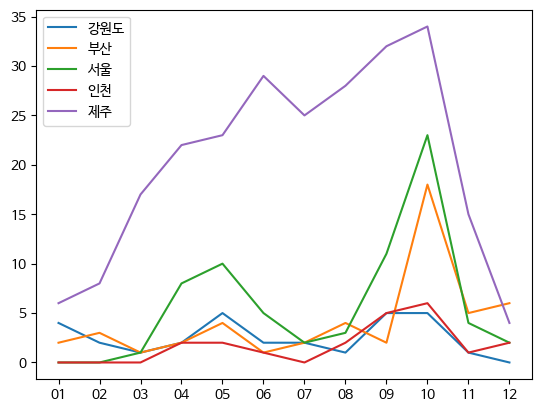

In [506]:
plt.plot(pivot_festival_month.loc['강원도',:'12'].index, list(pivot_festival_month.loc['강원도',:'12']), label='강원도')
plt.plot(pivot_festival_month.loc['부산',:'12'].index, list(pivot_festival_month.loc['부산',:'12']), label='부산')
plt.plot(pivot_festival_month.loc['서울',:'12'].index, list(pivot_festival_month.loc['서울',:'12']), label='서울')
plt.plot(pivot_festival_month.loc['인천',:'12'].index, list(pivot_festival_month.loc['인천',:'12']), label='인천')
plt.plot(pivot_festival_month.loc['제주',:'12'].index, list(pivot_festival_month.loc['제주',:'12']), label='제주')
# plt.plot(pivot_festival_month.loc['total',:'12'].index, list(pivot_festival_month.loc['total',:'12']), label='total')
plt.legend()
plt.show()

### 결론
* 축제가 열리는 기간에 해당 지역에 방문자 수가 증가하는지 방문객 수와 비교 필요